# Importing libraries


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importing & inspecting data

In [54]:
startup=pd.read_csv('StartupExpansionVZ.csv')
startup

,Unnamed: 0,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [55]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       150 non-null    int64  
 1   Store ID         150 non-null    int64  
 2   City             150 non-null    object 
 3   State            150 non-null    object 
 4   Sales Region     150 non-null    object 
 5   New Expansion    150 non-null    object 
 6   Marketing Spend  150 non-null    int64  
 7   Revenue          150 non-null    int64  
 8   Profit           150 non-null    int64  
 9   ROMS             150 non-null    float64
 10  ROMS%            150 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 13.0+ KB


In [56]:
startup[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


# Preprocessing Data

In [57]:
startup['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [58]:
startup['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [59]:
startup['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [60]:
startup['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [61]:
startup['State'].nunique()

35

In [62]:
startup['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [63]:
startup['Sales Region'].nunique()

2

In [64]:
startup['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [65]:
startup['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [66]:
startup['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [67]:
startup.isna().sum()

Unnamed: 0         0
Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
Profit             0
ROMS               0
ROMS%              0
dtype: int64

In [68]:
startup.duplicated().sum()

0

# Exploring & Analysing Data

In [69]:
startup.sample(10)

,Unnamed: 0,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
61,61,62,Simi Valley,California,Region 2,Old,2792,41110,38318,1372.42,13.7242
117,117,118,Bellevue,Washington,Region 2,Old,2542,40462,37920,1491.74,14.9174
74,74,75,Vancouver,Washington,Region 2,Old,3329,58951,55622,1670.83,16.7083
147,147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
26,26,27,Elizabeth,New Jersey,Region 1,Old,2557,45017,42460,1660.54,16.6054
116,116,117,Shreveport,Louisiana,Region 1,Old,3081,56140,53059,1722.14,17.2214
114,114,115,McAllen,Texas,Region 2,Old,2282,43924,41642,1824.80,18.2480
22,22,23,Montgomery,Alabama,Region 1,Old,3287,52114,48827,1485.46,14.8546
146,146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
71,71,72,Ontario,California,Region 2,Old,3168,52078,48910,1543.88,15.4388


<AxesSubplot:>

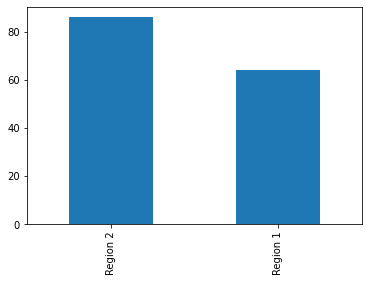

In [70]:
startup['Sales Region'].value_counts().plot.bar()

In [71]:
startup.groupby('New Expansion').groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [72]:
startup[startup['New Expansion']=='Old'].groupby(['State']).sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [73]:
startup[startup['New Expansion']=='New'].groupby(['State']).sum()['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [79]:
#startup['Roi']=round((startup['Revenue']/startup['Marketing Spend'])*100,2)

In [75]:
(startup['Revenue']/startup['Marketing Spend'])*100

0      1868.896578
1      1675.430876
2      1790.245665
3      1387.604204
4      2087.382363
          ...     
145    1537.227899
146    1718.312925
147    1638.104230
148     750.066800
149    1651.213492
Length: 150, dtype: float64

In [80]:
startup['Profit']=(startup['Revenue']- startup['Marketing Spend'])*100

In [78]:
startup

,Unnamed: 0,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%,Roi
0,0,1,Peoria,Arizona,Region 2,Old,2601,48610,4600900,1768.90,17.6890,1868.90
1,1,2,Midland,Texas,Region 2,Old,2727,45689,4296200,1575.43,15.7543,1675.43
2,2,3,Spokane,Washington,Region 2,Old,2768,49554,4678600,1690.25,16.9025,1790.25
3,3,4,Denton,Texas,Region 2,Old,2759,38284,3552500,1287.60,12.8760,1387.60
4,4,5,Overland Park,Kansas,Region 2,Old,2869,59887,5701800,1987.38,19.8738,2087.38
...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,Paterson,New Jersey,Region 1,New,2251,34603,3235200,1437.23,14.3723,1537.23
146,146,147,Brownsville,Texas,Region 2,New,3675,63148,5947300,1618.31,16.1831,1718.31
147,147,148,Rockford,Illinois,Region 1,New,2648,43377,4072900,1538.10,15.3810,1638.10
148,148,149,College Station,Texas,Region 2,New,2994,22457,1946300,650.07,6.5007,750.07


In [86]:
startup['ROMS']=round((startup['Profit']/startup['Marketing Spend'])*100,2)

In [87]:
startup['ROMS%']=startup['ROMS']/100

In [88]:
startup

,Unnamed: 0,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%,Roi,Roms
0,0,1,Peoria,Arizona,Region 2,Old,2601,48610,4600900,176889.66,1768.8966,1868.90,176889.66
1,1,2,Midland,Texas,Region 2,Old,2727,45689,4296200,157543.09,1575.4309,1675.43,157543.09
2,2,3,Spokane,Washington,Region 2,Old,2768,49554,4678600,169024.57,1690.2457,1790.25,169024.57
3,3,4,Denton,Texas,Region 2,Old,2759,38284,3552500,128760.42,1287.6042,1387.60,128760.42
4,4,5,Overland Park,Kansas,Region 2,Old,2869,59887,5701800,198738.24,1987.3824,2087.38,198738.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,Paterson,New Jersey,Region 1,New,2251,34603,3235200,143722.79,1437.2279,1537.23,143722.79
146,146,147,Brownsville,Texas,Region 2,New,3675,63148,5947300,161831.29,1618.3129,1718.31,161831.29
147,147,148,Rockford,Illinois,Region 1,New,2648,43377,4072900,153810.42,1538.1042,1638.10,153810.42
148,148,149,College Station,Texas,Region 2,New,2994,22457,1946300,65006.68,650.0668,750.07,65006.68


In [90]:
startup.drop(['Roi'],axis=1)

,Unnamed: 0,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%,Roms
0,0,1,Peoria,Arizona,Region 2,Old,2601,48610,4600900,176889.66,1768.8966,176889.66
1,1,2,Midland,Texas,Region 2,Old,2727,45689,4296200,157543.09,1575.4309,157543.09
2,2,3,Spokane,Washington,Region 2,Old,2768,49554,4678600,169024.57,1690.2457,169024.57
3,3,4,Denton,Texas,Region 2,Old,2759,38284,3552500,128760.42,1287.6042,128760.42
4,4,5,Overland Park,Kansas,Region 2,Old,2869,59887,5701800,198738.24,1987.3824,198738.24
...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,Paterson,New Jersey,Region 1,New,2251,34603,3235200,143722.79,1437.2279,143722.79
146,146,147,Brownsville,Texas,Region 2,New,3675,63148,5947300,161831.29,1618.3129,161831.29
147,147,148,Rockford,Illinois,Region 1,New,2648,43377,4072900,153810.42,1538.1042,153810.42
148,148,149,College Station,Texas,Region 2,New,2994,22457,1946300,65006.68,650.0668,65006.68


In [93]:
startup.drop(['Roms','Roi'],axis=1)

,Unnamed: 0,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,0,1,Peoria,Arizona,Region 2,Old,2601,48610,4600900,176889.66,1768.8966
1,1,2,Midland,Texas,Region 2,Old,2727,45689,4296200,157543.09,1575.4309
2,2,3,Spokane,Washington,Region 2,Old,2768,49554,4678600,169024.57,1690.2457
3,3,4,Denton,Texas,Region 2,Old,2759,38284,3552500,128760.42,1287.6042
4,4,5,Overland Park,Kansas,Region 2,Old,2869,59887,5701800,198738.24,1987.3824
...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,Paterson,New Jersey,Region 1,New,2251,34603,3235200,143722.79,1437.2279
146,146,147,Brownsville,Texas,Region 2,New,3675,63148,5947300,161831.29,1618.3129
147,147,148,Rockford,Illinois,Region 1,New,2648,43377,4072900,153810.42,1538.1042
148,148,149,College Station,Texas,Region 2,New,2994,22457,1946300,65006.68,650.0668


In [94]:
startup.to_csv('StartupExpansionVZ-modified.csv')